In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.datautils import *
from sklearn.preprocessing import StandardScaler

In [3]:
train_df = pd.read_csv("../UCRArchive_2018/Coffee/Coffee_TRAIN.tsv", sep = '\t', header = None)
test_df = pd.read_csv("../UCRArchive_2018/Coffee/Coffee_TEST.tsv", sep = '\t', header = None)

In [4]:
print(train_df.shape)
print(test_df.shape)

(28, 287)
(28, 287)


In [13]:
random_index = np.random.randint(1,28)
random_index

14

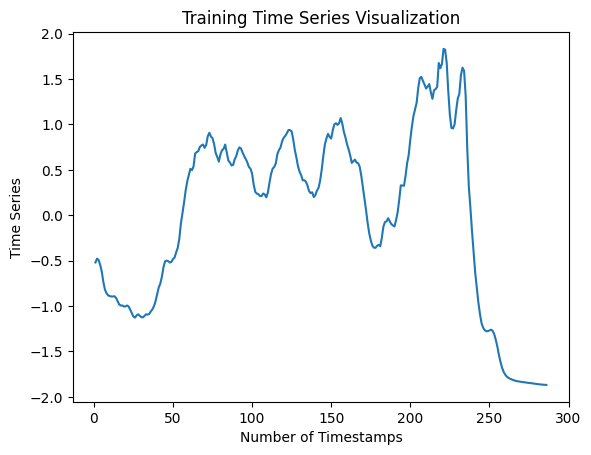

In [23]:
#plt.figsize(10,8)
x = np.arange(1,287)
y = train_df.iloc[random_index, 1:]
sns.lineplot(x = x,y = y)
plt.xlabel("Number of Timestamps")
plt.ylabel("Time Series")
plt.title("Training Time Series Visualization")
plt.show()

In [31]:
ss = StandardScaler()
train_data = ss.fit_transform(train_df)

<Axes: >

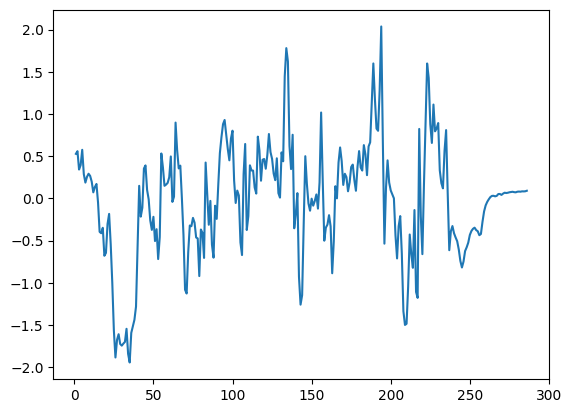

In [33]:
sns.lineplot(x = np.arange(1,287), y = train_data[random_index, 1:])

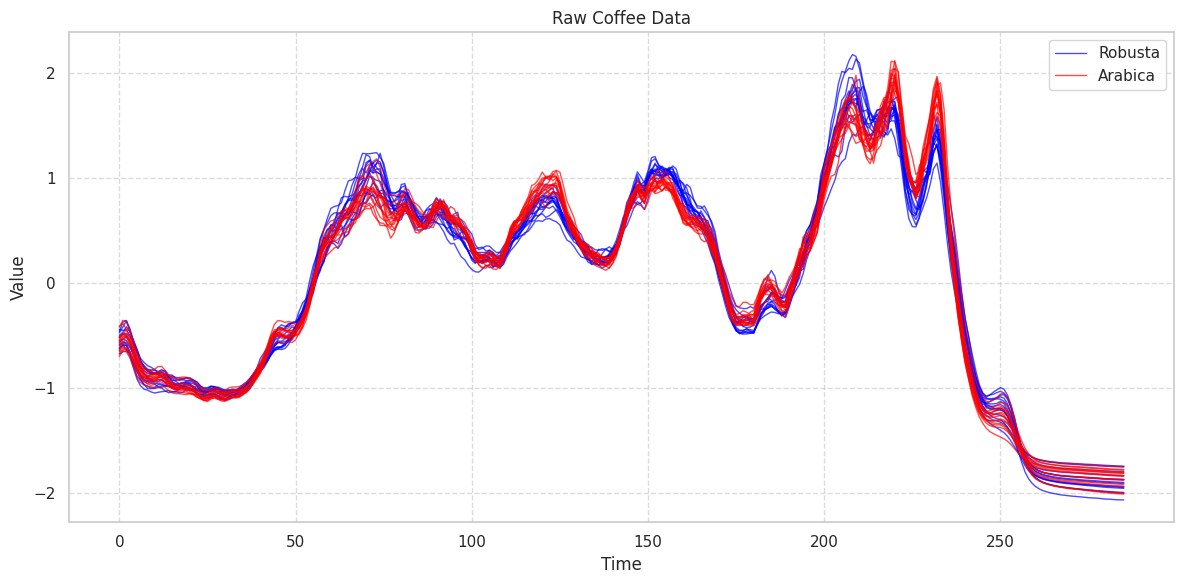

In [56]:
def plot_time_series_by_class(df):
    """
    Plot all time series samples from a dataframe, colored by class label.
    
    Parameters:
    df (DataFrame): DataFrame with shape (28, 287) where the first column is the class label
                   and the rest are time series values.
    """
    # Make a copy to avoid modifying the original dataframe
    data = df.copy()
    
    # Extract class labels from the first column
    class_labels = data.iloc[:, 0].values
    
    # Remove the class label column for plotting time series
    time_series_data = data.iloc[:, 1:]
    
    # Create x-axis values (time points)
    time_points = np.arange(time_series_data.shape[1])
    
    # Create figure and axis
    plt.figure(figsize=(12, 6))
    
    # Colors for different classes
    colors = ['blue', 'red']
    class_names = ["Robusta", "Arabica"]
    
    # Keep track of handles for legend
    handles = []
    
    # Plot each time series with color based on its class
    for i, (label, series) in enumerate(zip(class_labels, time_series_data.values)):
        line, = plt.plot(time_points, series, color=colors[int(label)], 
                         alpha=0.7, linewidth=1)
        
        # Only add to handles if this class hasn't been added yet
        if i == 0 or label != class_labels[i-1]:
            handles.append(line)
    
    # Add labels and legend
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Raw Coffee Data')
    plt.legend(handles, [class_names[int(label)] for label in np.unique(class_labels)])
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
plot_time_series_by_class(train_df)

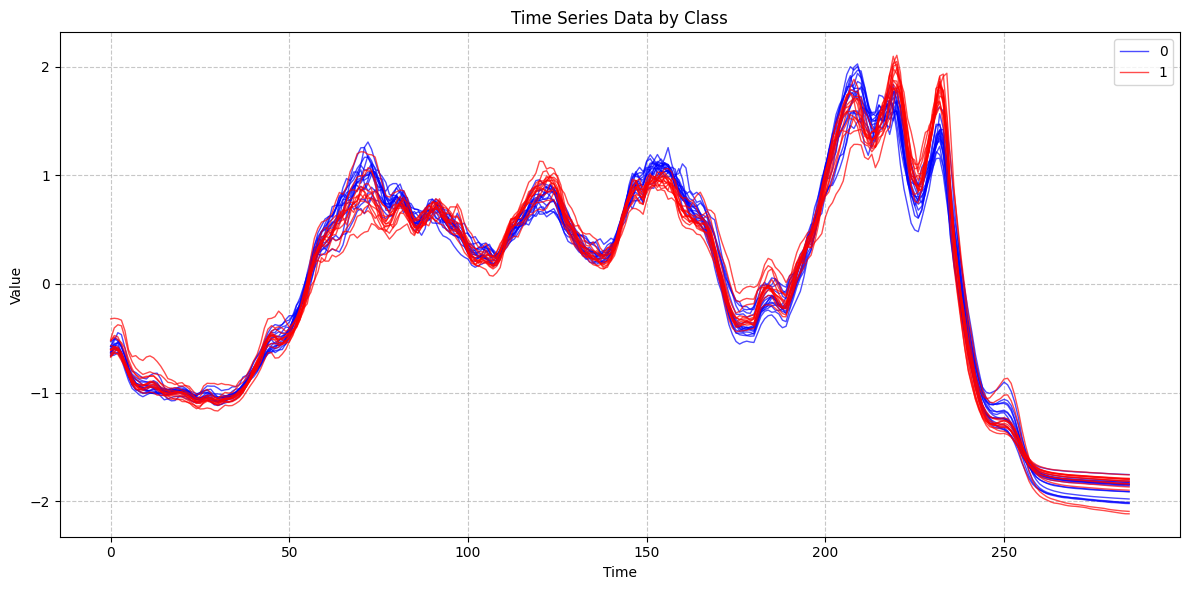

In [40]:
plot_time_series_by_class(test_df)

In [41]:
train_df_transformed = ss.fit_transform(train_df)
test_df_transformed = ss.transform(test_df)

In [45]:
train_df_transformed = pd.DataFrame(train_df_transformed)
train_df_transformed.head

<bound method NDFrame.head of     0         1         2         3         4         5         6         7    \
0  -1.0  0.544723  0.459212  0.201386  0.228292  0.370798  0.063301  0.057904   
1  -1.0  0.156398 -0.137564  0.090870  0.239652  0.489598  0.387494  0.507956   
2  -1.0  1.136530  1.337417  1.851685  1.816817  1.424077  1.582821  1.437015   
3  -1.0  0.659738  0.480014  0.509158  0.827218  1.343296  1.322826  1.251602   
4  -1.0 -0.037037 -0.140253 -0.240135 -0.237943 -0.304464 -0.450938 -0.771264   
5  -1.0  1.539148  0.915157  0.889215  0.994622  1.067299  1.364976  1.290949   
6  -1.0  0.828849  0.711505  1.215761  1.468836  1.243311  1.091871  1.301357   
7  -1.0  1.292367  1.915716  1.917811  1.472614  1.562934  1.621155  1.688396   
8  -1.0 -0.489919 -0.465918 -0.517949 -0.403872 -0.056458  0.198427  0.548300   
9  -1.0 -1.095550 -0.770580 -0.808082 -1.197898 -1.460401 -1.537416 -1.316513   
10 -1.0 -1.453218 -1.623229 -1.388937 -1.011572 -0.887510 -0.779204 -0.665289  

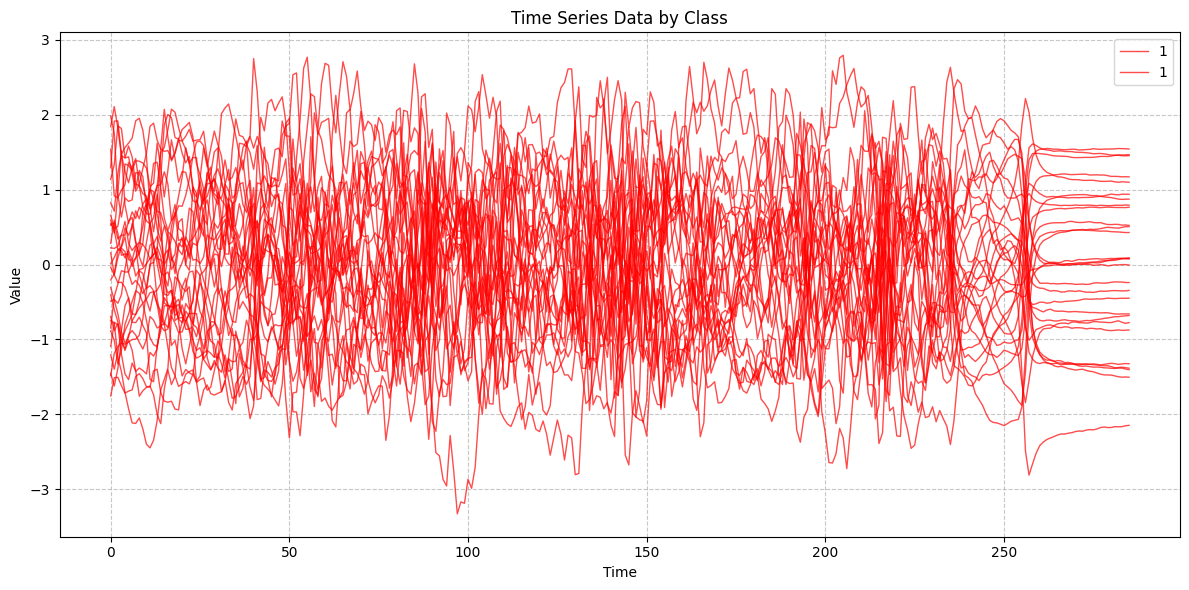

In [44]:
plot_time_series_by_class(pd.DataFrame(train_df_transformed))

In [20]:
Dataset_name = "Coffee"
dataset_path_ = "../UCRArchive_2018/"
Xtrain_raw, ytrain_raw, Xval_raw, yval_raw, Xtest_raw, ytest_raw = Readdataset(dataset_path_, Dataset_name)

In [21]:
T = Xtrain_raw.shape[1]//3
T

286

In [22]:
Xtrain_ori, Xtrain_fft, Xtrain_dif = Splitview(Xtrain_raw, T)

<Axes: >

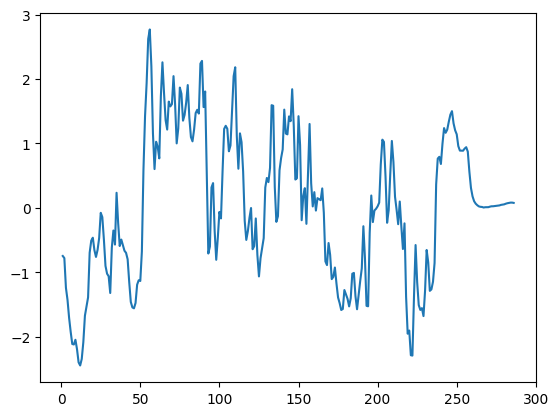

In [25]:
sns.lineplot(x = np.arange(1,287), y = Xtrain_ori[0,:])

KeyError: -1

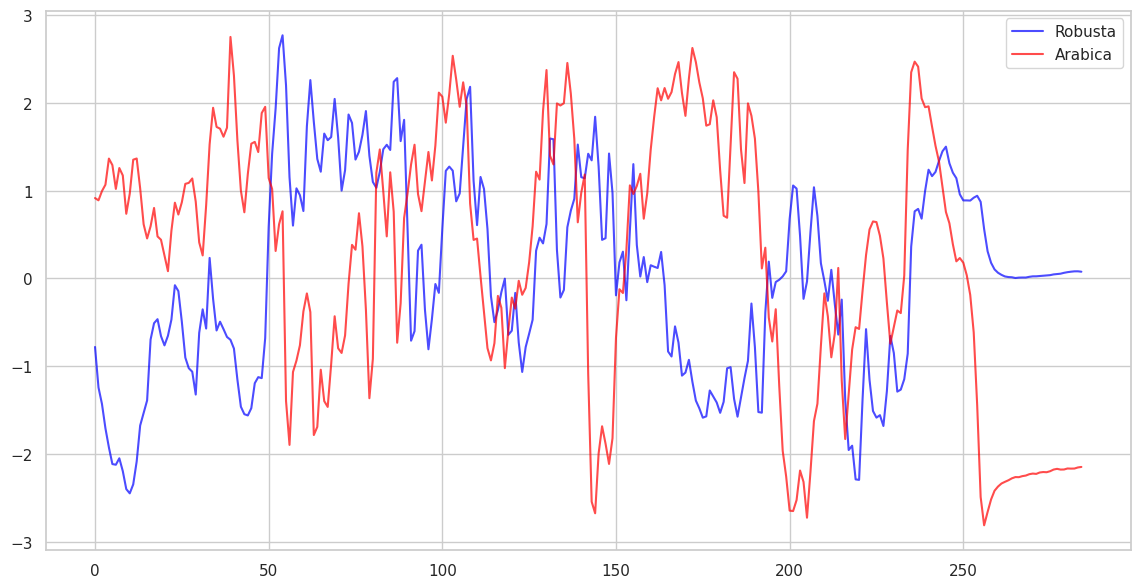

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_coffee_time_series(data_array):
    """
    Plot coffee bean time series data using Seaborn, colored by class label.
    
    Parameters:
    data_array (numpy.ndarray): Array with shape (28, 287) where the first column is the class label
                               and the rest are time series values.
    """
    # Set the Seaborn style
    sns.set(style="whitegrid")
    
    # Extract class labels from the first column
    class_labels = data_array[:, 0]
    
    # Remove the class label column for plotting time series
    time_series_data = data_array[:, 1:]
    
    # Create x-axis values (time points)
    time_points = np.arange(time_series_data.shape[1])
    
    # Create figure and axis
    plt.figure(figsize=(14, 7))
    
    # Define colors and class names
    palette = {"Robusta": "blue", "Arabica": "red"}
    class_mapping = {0: "Robusta", 1: "Arabica"}
    
    # Plot each time series
    for i, (label, series) in enumerate(zip(class_labels, time_series_data)):
        coffee_type = class_mapping[int(label)]
        sns.lineplot(
            x=time_points,
            y=series,
            color=palette[coffee_type],
            alpha=0.7,
            label=coffee_type if coffee_type not in plt.gca().get_legend_handles_labels()[1] else None
        )
    
    # Customize the plot
    plt.title('Coffee Bean Classification: Robusta vs Arabica', fontsize=16)
    plt.xlabel('Time Points (Spectrograph Readings)', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(title='Coffee Type', fontsize=10, title_fontsize=12)
    
    # Add a light grid
    sns.despine(left=True, bottom=True)
    
    plt.tight_layout()
    plt.show()

plot_coffee_time_series(Xtrain_ori)

In [49]:

# Generate a random numpy array with the given dimensions for demonstration purposes
# In practice, you would load your actual data here
data = Xtrain_ori

# Convert the numpy array to a pandas DataFrame
df = pd.DataFrame(data)

# Rename the columns for better readability
df.columns = ['class_label'] + [f'signal_{i}' for i in range(1, 286)]


df.head

<bound method NDFrame.head of     class_label  signal_1  signal_2  signal_3  signal_4  signal_5  signal_6  \
0     -0.748651 -0.781367 -1.242676 -1.430327 -1.708119 -1.926021 -2.115538   
1      1.539148  0.915157  0.889215  0.994622  1.067299  1.364976  1.290949   
2     -1.453218 -1.623229 -1.388937 -1.011572 -0.887510 -0.779204 -0.665289   
3     -1.755503 -1.512805 -1.506428 -1.618755 -1.718134 -1.691377 -1.674678   
4      0.544723  0.459212  0.201386  0.228292  0.370798  0.063301  0.057904   
5     -0.307187 -0.477134 -0.658924 -0.899260 -1.050390 -0.971274 -0.750145   
6     -0.848067 -0.427072 -0.262611 -0.082823 -0.099884 -0.099106  0.033251   
7      0.010209  0.093732  0.202884  0.187533  0.088463  0.184028  0.061388   
8      0.593704  0.416927  0.959197  1.517113  0.795116  0.548459  0.703140   
9      0.828849  0.711505  1.215761  1.468836  1.243311  1.091871  1.301357   
10    -0.489919 -0.465918 -0.517949 -0.403872 -0.056458  0.198427  0.548300   
11    -0.694315 -0.885

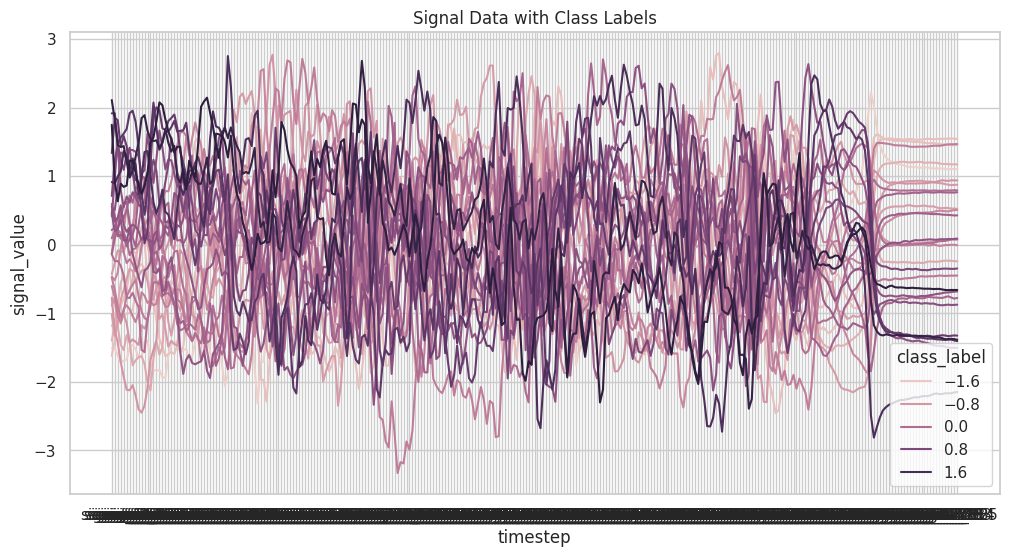

In [50]:
# Melt the DataFrame to long format for seaborn
df_melted = df.melt(id_vars='class_label', var_name='timestep', value_name='signal_value')

# Plot the data using seaborn with hue as class label
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='timestep', y='signal_value', hue='class_label')
plt.title('Signal Data with Class Labels')
plt.show()

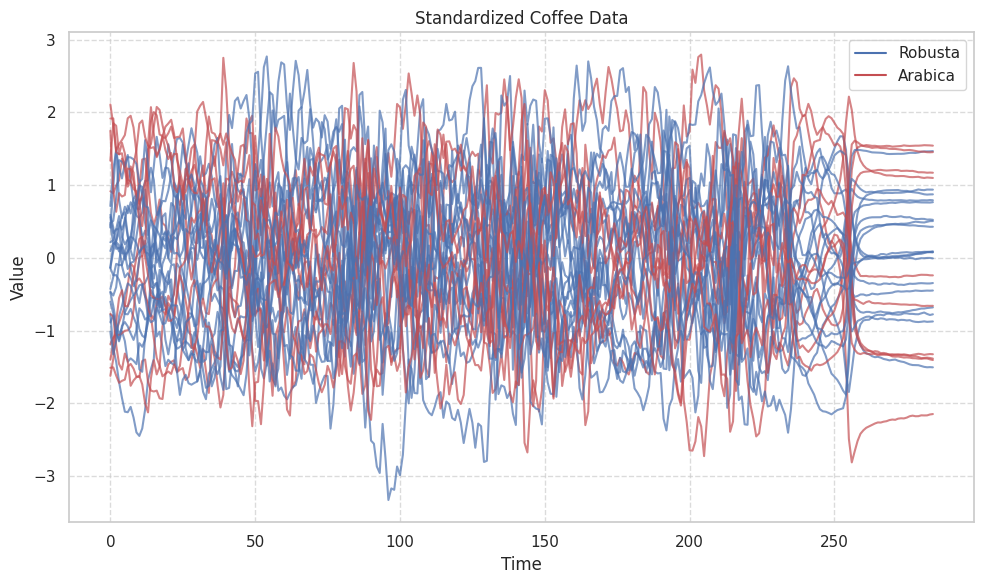

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data - replace this with your actual data
# Format: First column is class label (0 or 1), remaining columns are time series values
sample_data = np.array([
    [0, 1.2, 2.3, 3.1, 2.5, 1.8],  # Class 0
    [1, 2.1, 3.2, 3.5, 4.1, 3.8],  # Class 1
    [0, 1.5, 2.1, 2.8, 2.2, 1.9],  # Class 0
    [1, 2.3, 3.0, 3.8, 4.2, 4.0],  # Class 1
    [0, 1.3, 2.0, 2.5, 2.3, 1.7]   # Class 0
])

# Extract class labels and time series data
labels = Xtrain_ori[:, 0].astype(int)
time_series = Xtrain_ori[:, 1:]

# Create x-axis values (time points)
time_points = np.arange(time_series.shape[1])

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot each time series with color based on class label
for i in range(len(labels)):
    if labels[i] == 0:
        plt.plot(time_points, time_series[i], 'b-', alpha=0.7)
    else:
        plt.plot(time_points, time_series[i], 'r-', alpha=0.7)

# Add dummy plots for the legend
plt.plot([], [], 'b-', label='Robusta')
plt.plot([], [], 'r-', label='Arabica')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Standardized Coffee Data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()